In [1]:
#library yang dibutuhkan

import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Memanggil dlib untuk proses landmark untuk menentukan titik koordinat pada wajah

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
#Dapat di download di http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

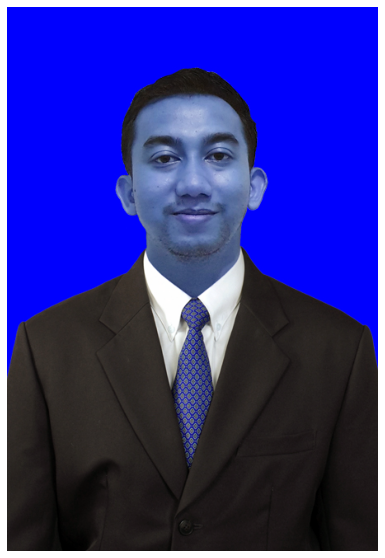

In [8]:
img_path = "rgb.jpg"

#Membaca file dengan OpenCV
img = cv2.imread(img_path)

#Menampilkan hasil membaca file dengan matplotlib
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img)

#Mendeteksi wajah
faces = face_detector(img, 1)

In [3]:
#Mendeteksi Landmark pada wajah
landmark_tuple = []
for k, d in enumerate(faces):
   landmarks = landmark_detector(img, d)
   for n in range(0, 27):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmark_tuple.append((x, y))
      cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

In [4]:
#Menyimpan titik koordinat dari landmark yang dideteksi sebelumnya ke dalam array
routes = []
 
for i in range(15, -1, -1):
   from_coordinate = landmark_tuple[i+1]
   to_coordinate = landmark_tuple[i]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)
 
for i in range(17, 20):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)
 
for i in range(24, 26):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

In [5]:
#Membuat garis pinggiran dari hasil deteksi landmark yang digunakan untuk croping wajah nantinya
for i in range(0, len(routes)-1):
   from_coordinate = routes[i]
   to_coordinate = routes[i+1]
   img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)

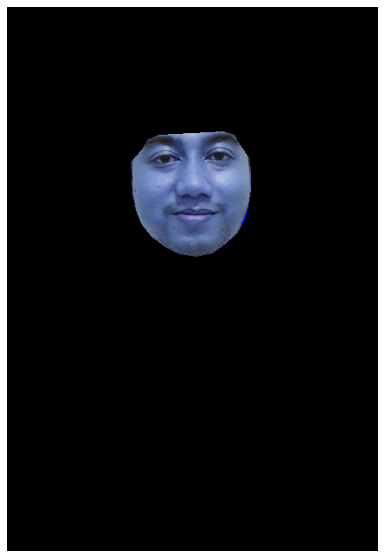

In [9]:
#Seteah dibuat garis, maka melakukan croping wajah
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)
 
out = np.zeros_like(img)
out[mask] = img[mask]

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(out)

True

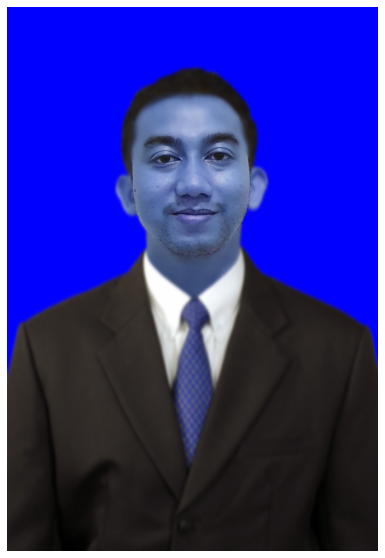

In [10]:
#Membuat fungsi blur
def blur_img(img, factor = 20):
   kW = int(img.shape[1] / factor)
   kH = int(img.shape[0] / factor)
    
   #ensure the shape of the kernel is odd
   if kW % 2 == 0: kW = kW - 1
   if kH % 2 == 0: kH = kH - 1
    
   blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
   return blurred_img

#Menerapkan fungsi blur pada foto dan membuat wajah tetap tidak blur
blurred_img = blur_img(img, factor = 60)
blurred_img[mask] = img[mask]
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img)

cv2.imwrite('FacialLandmark.jpg', blurred_img)